# Python-Blu Marketing  
# Author: NeDa

## Problem Definition

#### The small city of blufield has a total number of 8000 families. Each family lives in a house. These house are disturbed over a square shaped area of 5000 by 5000 meters by the following distribution: 1)1/4 of the house are distributed normally (mean in center) in 2000-by-2000 square in the center. With SD=500 meters. 2) The remaining 3/4 are distribute normally (mean in center) all over the city with SD=1250 meters.
#### Blu, as online bank,wants to see how much people spend on transportation to regular bank. Assume the banks are located in the following locations:
#### A:2000,2500
#### B:4200,4000
#### C:3500,500
#### D: 1000,4200
#### E: 700,500
#### When going to a bank,people choose the nearest bank available. If it is less than 500 meters away,it would cost 1 unit of money to get there, if it is less than a kilometer away it costs 3 and otherwise it costs 5 units of money to get there. Using this information, answer the following:
#### 1) In which areas of the city should blu focus on advertising about how using blu would decrease transportaion costs more? Provide a heatmap.
#### 2) Where is the best location to build a new bank to minimize the transportaion costs? Providing a heatmap of a mesure of of "goodness of location" is a plus.

## Program using Python 3.7 with Python Anaconda 4.4.0 (64-bit) IDE REGUIRED Python Modules =[pandas, numpy, matplylib, seaborn, scipy]


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde

### First, the location of townhouses must be generated. The generate_data function is defined for this purpose. This function generates normal data with a specific SD using the random. normal module.
### The next section shows the location of houses and banks in the city using the plot module.


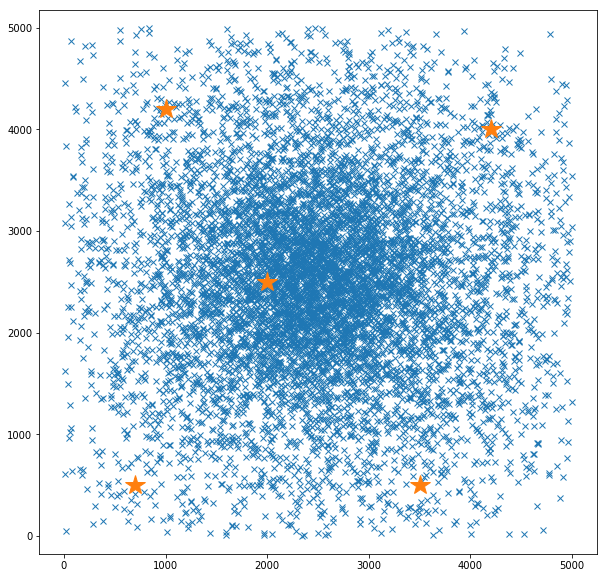

In [2]:
def generate_data(n, upper, sigma):
    count = 0
    points = np.empty((0,2))
    while count < n:
        point = np.random.normal(0, sigma, 2)
        if (np.abs(point[0])<= upper) and (np.abs(point[1])<= upper):
            count += 1
            points = np.vstack((points, point))
    points += 2500
    return points
banks_locations = np.array([(2000, 2500), (4200,4000), (3500, 500), (1000, 4200), (700, 500)])
inner_points = generate_data(2000, 2500/2, 500)
outer_points = generate_data(6000, 5000/2, 1250)
points = np.concatenate((inner_points, outer_points))
f=plt.figure(figsize=(10,10))
plt.plot(points[:, 0], points[:, 1], 'x', figure=f)
plt.plot(banks_locations[:,0], banks_locations[:,1], '*', ms=20 , figure=f)
plt.axis('equal')
plt.show()

### The distance between each house to different banks is calculated by using the cdist module.
### The next step, the cost of transportation from each house to different banks is calculated and stored in costs list.



In [3]:
distances = cdist(points, banks_locations, metric='euclidean')
costs = []
for distance_list in distances:
    distance_min = min(distance_list)
    if distance_min < 500:
        cost = 1
    elif distance_min < 1000:
        cost = 3
    else:
        cost = 5
    costs.append(cost)

## PART 1

### Craete a heatmap using “tripcolor”.  This module creates a heatmap with average data.

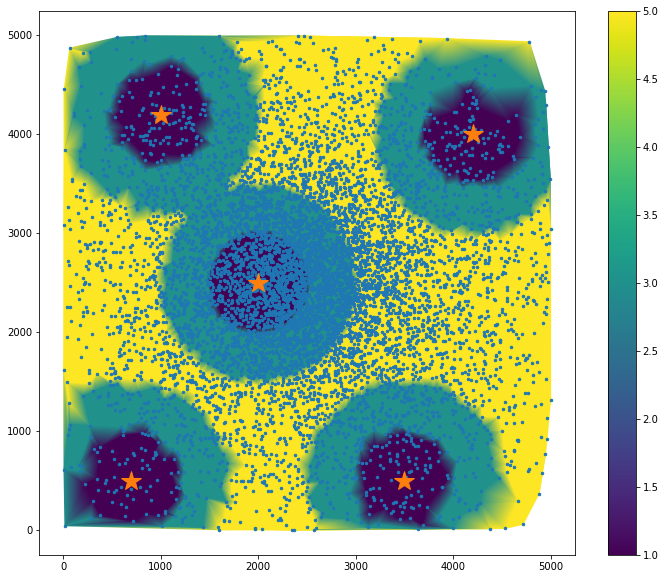

In [4]:
x = points[:, 0]
y = points[:, 1]
z = costs
f= plt.figure(figsize=(12,10))
c = plt.tripcolor(x,y,z, shading='gouraud', figure=f)
f.colorbar(c)
plt.plot(x,y, '.' , ms=5)
plt.plot(banks_locations[:, 0], banks_locations[:, 1], '*', ms=20)

### First, the gaussian KDE model is created for the position of the houses and the transportation costs.
### The surface of the city has meshed. To estimate the weight(transportation cost) , The KDE model is used
 



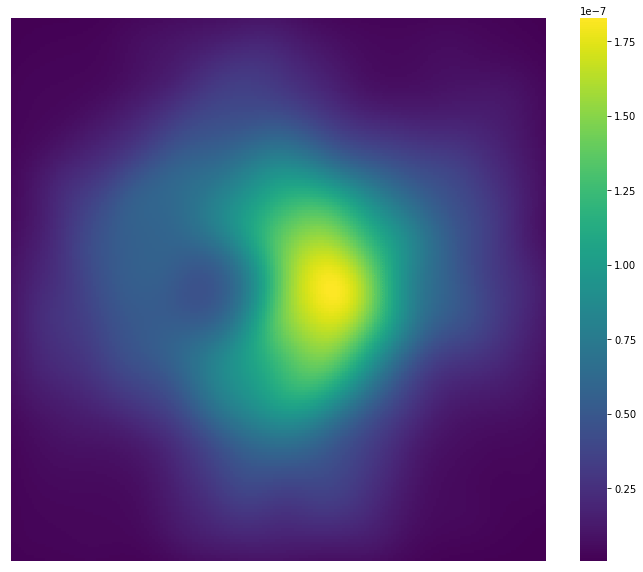

In [5]:
kde_pdf = gaussian_kde(points.transpose(), 'scott', costs)
x_mesh = np.linspace(0, 5000, 200)
y_mesh = np.linspace(0, 5000, 200)
xv, yv = np.meshgrid(x_mesh,y_mesh)
grid_points = np.vstack([xv.flatten(), yv.flatten()]).transpose()

costs_kde = kde_pdf(grid_points.transpose())
f= plt.figure(figsize=(12,10))
sns.heatmap(costs_kde.reshape(200,200), cmap='viridis', figure=f, xticklabels=[], yticklabels=[])

plt.plot(banks_locations[:, 0], banks_locations[:, 1], '*', ms=20)

### As shown in the chart above, the yellow area is the best area for advertising.


## PART 2

### First, the area of the city has meshed. In this case, 10,000 points are created for the position of the new bank.
### Then the transportain cost for each family to the banks is calculated (according to the position of the previous banks and the new bank). The best position is determined by the lowest transportaion cost for the whole family



In [33]:
x_mesh = np.linspace(0, 5000, 50)
y_mesh = np.linspace(0, 5000, 50)
xv, yv = np.meshgrid(x_mesh,y_mesh)
new_banks = np.vstack([xv.flatten(), yv.flatten()]).transpose()

new_banks_locactions = banks_locations

sum_costs = []

for index, new_bank in enumerate(new_banks):
    new_banks_locations = np.concatenate((banks_locations, new_bank.reshape(1,2)))
    distances = cdist(points, new_banks_locations, metric='euclidean')
    costs = []
    for distance_list in distances:
        distance_min = min(distance_list)
        if distance_min < 500:
            cost = 1
        elif distance_min < 1000:
            cost = 3
        else:
            cost = 5
        costs.append(cost)
    sum_costs.append(sum(costs))
min_index = sum_costs.index(min(sum_costs))  
new_bank = new_banks[min_index]
print(new_bank)

[2959.18367347 2448.97959184]


### create heatmap for new costs with tripcolor.

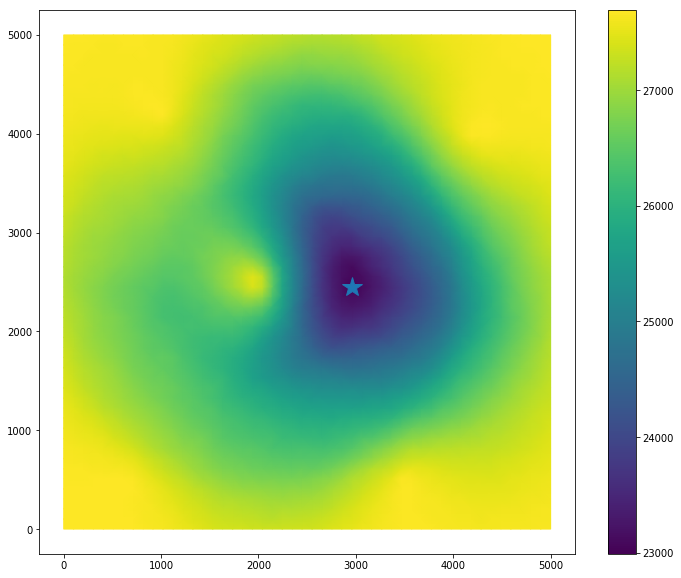

In [35]:
import numpy as np
import matplotlib.pyplot as plt

f= plt.figure(figsize=(12,10))

c = plt.tripcolor(new_banks[:,0], new_banks[:,1], sum_costs, shading='gouraud', figure=f, cmap='viridis')
f.colorbar(c)

plt.plot(new_bank[0], new_bank[1], '*', ms=20)